In [ ]:
spacy.__version__

'3.8.7'

In [1]:
import spacy
nlp = spacy.blank('en')
# Process the text
doc = nlp("I like tree kangaroos and narwhals.")
# Select the first token
first_token = doc[0]
# Print the first token's text
print(doc.vocab)
print(type(doc))
print(first_token.text)

<class 'spacy.tokens.doc.Doc'>
I


In [ ]:
#Setting Custom Attribute:
from spacy.tokens import Token
fruit_getter = lambda token: token.text in ("apple", "pear", "banana")
Token.set_extension("is_fruits", getter=fruit_getter)
doc = nlp("I have an apple")
for token in doc:
    print(token.text, token._.is_fruits)

I False
have False
an False
apple True


In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Steve Jobs founded Apple in 1976.")

for token in doc:
    print(f"{token.text:12} POS: {token.pos_:6} DEP: {token.dep_:10} Lemma: {token.lemma_}")


Steve        POS: PROPN  DEP: compound   Lemma: Steve
Jobs         POS: PROPN  DEP: nsubj      Lemma: Jobs
founded      POS: VERB   DEP: ROOT       Lemma: found
Apple        POS: PROPN  DEP: dobj       Lemma: Apple
in           POS: ADP    DEP: prep       Lemma: in
1976         POS: NUM    DEP: pobj       Lemma: 1976
.            POS: PUNCT  DEP: punct      Lemma: .


In [ ]:
doc = nlp(
    "In 1990, more than 60% of people in East Asia were in extreme poverty. "
    "Now less than 4% are."
)
for token in doc:
  if token.like_num:
    print(f'Index:{doc[token.i]},word:{token}')

Index:1990,word:1990
Index:60,word:60
Index:4,word:4


In [ ]:
nlp = spacy.load("en_core_web_sm")

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")

It          PRON      nsubj     
’s          VERB      ccomp     
official    NOUN      attr      
:           PUNCT     punct     
Apple       PROPN     nsubj     
is          AUX       ROOT      
the         DET       det       
first       ADJ       amod      
U.S.        PROPN     nmod      
public      ADJ       amod      
company     NOUN      attr      
to          PART      aux       
reach       VERB      relcl     
a           DET       det       
$           SYM       quantmod  
1           NUM       compound  
trillion    NUM       nummod    
market      NOUN      compound  
value       NOUN      dobj      


In [ ]:
text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Apple ORG
first ORDINAL
U.S. GPE
$1 trillion MONEY


In [ ]:
# Import the Matcher
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
doc = nlp("Upcoming iPhone X release date leaked as Apple reveals pre-orders")

# Initialize the Matcher with the shared vocabulary
matcher = Matcher(nlp.vocab)

# Create a pattern matching two tokens: "iPhone" and "X"
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]

# Add the pattern to the matcher
matcher.add("IPHONE_X_PATTERN", [pattern])

# Use the matcher on the doc
matches = matcher(doc)
print("Matches:", [doc[start:end].text for match_id, start, end in matches])

Matches: ['iPhone X']


In [ ]:
matcher = Matcher(nlp.vocab)

doc = nlp(
    "After making the iOS update you won't notice a radical system-wide "
    "redesign: nothing like the aesthetic upheaval we got with iOS 7. Most of "
    "iOS 11's furniture remains the same as in iOS 10. But you will discover "
    "some tweaks once you delve a little deeper."
)

# Write a pattern for full iOS versions ("iOS 7", "iOS 11", "iOS 10")
pattern = [{"TEXT": "iOS"}, {"IS_DIGIT": True}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("IOS_VERSION_PATTERN", [pattern])
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print(match_id)
    print("Match found:", doc[start:end].text)

Total matches found: 3
2870259198116999432
Match found: iOS 7
2870259198116999432
Match found: iOS 11
2870259198116999432
Match found: iOS 10


In [ ]:
doc = nlp(
    "Features of the app include a beautiful design, smart search, automatic "
    "labels and optional voice responses."
)

# Write a pattern for adjective plus one or two nouns
pattern = [{"POS": "ADJ"}, {"POS": "NOUN"}, {"POS": "NOUN", "OP": "?"}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("ADJ_NOUN_PATTERN", [pattern])
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 5
Match found: beautiful design
Match found: smart search
Match found: automatic labels
Match found: optional voice
Match found: optional voice responses


In [ ]:
lp = spacy.blank("en")
doc = nlp("I have a cat")

# Look up the hash for the word "cat"
cat_hash = nlp.vocab.strings["cat"]
print(cat_hash)

# Look up the cat_hash to get the string
cat_string = nlp.vocab.strings[cat_hash]
print(cat_string)

5439657043933447811
cat


In [ ]:
from spacy.tokens import Doc

# Desired text: "spaCy is cool!"
words = ["spaCy", "is", "cool", "!"]
spaces = [True, True, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

spaCy is cool!


In [ ]:
from spacy.tokens import Doc, Span

words = ["I", "like", "David", "Bowie"]
spaces = [True, True, True, False]

# Create a doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

# Create a span for "David Bowie" from the doc and assign it the label "PERSON"
span = Span(doc, 2, 4, label="PERSON")
print(span.text, span.label_)

# Add the span to the doc's entities
doc.ents = [span]

# Print entities' text and labels
print([(ent.text, ent.label_) for ent in doc.ents])

I like David Bowie
David Bowie PERSON
[('David Bowie', 'PERSON')]


In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("Berlin looks like a nice city")
for token in doc:
    # Check if the current token is a proper noun
    if token.pos_== "PROPN":
        # Check if the next token is a verb
        if doc[token.i+1].pos_ == "VERB":
            result = token
            print("Found proper noun before a verb:", result)

Found proper noun before a verb: Berlin


In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 43.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load('en_core_web_md')
# Process a text
doc = nlp("Two bananas in pyjamas")
# Get the vector for the token "bananas"
bananas_vector = doc[1].vector
print(len(bananas_vector))
print(bananas_vector)

300
[-0.6334     0.18981   -0.53544   -0.52658   -0.30001    0.30559
 -0.49303    0.14636    0.012273   0.96802    0.0040354  0.25234
 -0.29864   -0.014646  -0.24905   -0.67125   -0.053366   0.59426
 -0.068034   0.10315    0.66759    0.024617  -0.37548    0.52557
  0.054449  -0.36748   -0.28013    0.090898  -0.025687  -0.5947
 -0.24269    0.28603    0.686      0.29737    0.30422    0.69032
  0.042784   0.023701  -0.57165    0.70581   -0.20813   -0.03204
 -0.12494   -0.42933    0.31271    0.30352    0.09421   -0.15493
  0.071356   0.15022   -0.41792    0.066394  -0.034546  -0.45772
  0.57177   -0.82755   -0.27885    0.71801   -0.12425    0.18551
  0.41342   -0.53997    0.55864   -0.015805  -0.1074    -0.29981
 -0.17271    0.27066    0.043996   0.60107   -0.353      0.6831
  0.20703    0.12068    0.24852   -0.15605    0.25812    0.007004
 -0.10741   -0.097053   0.085628   0.096307   0.20857   -0.23338
 -0.077905  -0.030906   1.0494     0.55368   -0.10703    0.052234
  0.43407   -0.13926 

In [ ]:
nlp = spacy.load("en_core_web_md")

doc1 = nlp("It's a warm summer day")
doc2 = nlp("It's sunny outside")

# Get the similarity of doc1 and doc2
similarity = doc1.similarity(doc2)
print(similarity)

0.8456854224205017


In [ ]:
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
doc = nlp(
    "Twitch Prime, the perks program for Amazon Prime members offering free "
    "loot, games and other benefits, is ditching one of its best features: "
    "ad-free viewing. According to an email sent out to Amazon Prime members "
    "today, ad-free viewing will no longer be included as a part of Twitch "
    "Prime for new members, beginning on September 14. However, members with "
    "existing annual subscriptions will be able to continue to enjoy ad-free "
    "viewing until their subscription comes up for renewal. Those with "
    "monthly subscriptions will have access to ad-free viewing until October 15."
)

# Create the match patterns
pattern1 = [{"LOWER": "amazon"}, {"IS_TITLE": True, "POS": "PROPN"}]
pattern2 = [{"LOWER": "ad"},{"TEXT":"-"},{"LOWER":"free"}, {"POS": "NOUN"}]

# Initialize the Matcher and add the patterns
matcher = Matcher(nlp.vocab)
matcher.add("PATTERN1", [pattern1])
matcher.add("PATTERN2", [pattern2])

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Print pattern string name and text of matched span
    print(doc.vocab.strings[match_id], doc[start:end].text)

PATTERN1 Amazon Prime
PATTERN2 ad-free viewing
PATTERN1 Amazon Prime
PATTERN2 ad-free viewing
PATTERN2 ad-free viewing
PATTERN2 ad-free viewing


In [ ]:
from spacy.matcher import PhraseMatcher
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Create PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

# Phrases to match
skills = ["data science", "machine learning", "python", "deep learning"]
patterns = [nlp.make_doc(text) for text in skills]
matcher.add("SKILL", patterns)

# List of texts (e.g., resumes or job descriptions)
texts = [
    "I have experience with data science and python.",
    "My work focuses on deep learning and AI.",
    "I am a machine learning engineer."
]

# Process efficiently using nlp.pipe()
for doc in nlp.pipe(texts):
    matches = matcher(doc)
    print(matches)
    print(f"\nText: {doc.text}")
    for match_id, start, end in matches:
        span = doc[start:end]
        print(f"Matched phrase: {span.text}")


# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Create PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

# Phrases to match
skills = ["data science", "machine learning", "python", "deep learning"]
patterns = [nlp.make_doc(text) for text in skills]
matcher.add("SKILL", patterns)

# List of texts (e.g., resumes or job descriptions)
texts = [
    "I have experience with data science and python.",
    "My work focuses on deep learning and AI.",
    "I am a machine learning engineer."
]

# Process efficiently using nlp.pipe()
for doc in nlp.pipe(texts):
    matches = matcher(doc)
    print(f"\nText: {doc.text}")
    for match_id, start, end in matches:
        span = doc[start:end]
        print(f"Matched phrase: {span.text}")


[(246859891514552380, 4, 6), (246859891514552380, 7, 8)]

Text: I have experience with data science and python.
Matched phrase: data science
Matched phrase: python
[(246859891514552380, 4, 6)]

Text: My work focuses on deep learning and AI.
Matched phrase: deep learning
[(246859891514552380, 3, 5)]

Text: I am a machine learning engineer.
Matched phrase: machine learning

Text: I have experience with data science and python.
Matched phrase: data science
Matched phrase: python

Text: My work focuses on deep learning and AI.
Matched phrase: deep learning

Text: I am a machine learning engineer.
Matched phrase: machine learning


In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
print(nlp.pipeline)

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x79d68d7fb470>), ('tagger', <spacy.pipeline.tagger.Tagger object at 0x79d68d7fbc50>), ('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x79d68ed4ac00>), ('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x79d68c4bc450>), ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer object at 0x79d68d8bcdd0>), ('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x79d68ed4b6f0>)]


In [ ]:
from spacy.language import Language

# Define the custom component
@Language.component("length_component")
def length_component_function(doc):
    # Get the doc's length
    doc_length = len(doc)
    print(f"This document is {doc_length} tokens long.")
    # Return the doc
    return doc

# Load the small English pipeline
nlp = spacy.load("en_core_web_sm")

# Add the component first in the pipeline and print the pipe names
nlp.add_pipe("length_component",first=True)
print(nlp.pipe_names)

# Process a text
doc = nlp("this is gaja")

['length_component', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
This document is 3 tokens long.


# Here We See that the below code snippet doesn't show any results beacause cat and dof (Golden Retriver) are not a specific named entities in any language.

In [ ]:
nlp=spacy.load('en_core_web_sm')
doc1= nlp("I have a cat and a Golden Retriever")
for ent in doc1.ents:
  print(ent.text,ent.label_)

In [ ]:
from spacy.language import Language
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")
animals = ["Golden Retriever", "cat", "turtle", "Rattus norvegicus"]
animal_patterns = list(nlp.pipe(animals))
print("animal_patterns:", animal_patterns)
matcher = PhraseMatcher(nlp.vocab)
matcher.add("ANIMAL", animal_patterns)

# Define the custom component
@Language.component("animal_component")
def animal_component_function(doc):
    # Apply the matcher to the doc
    matches = matcher(doc)
    # Create a Span for each match and assign the label "ANIMAL"
    spans = [Span(doc, start,end, label='ANIMAL') for match_id, start, end in matches]
    # Overwrite the doc.ents with the matched spans
    doc.ents = spans
    return doc


# Add the component to the pipeline after the "ner" component
nlp.add_pipe("animal_component",after='ner')
print(nlp.pipe_names)

# Process the text and print the text and label for the doc.ents
doc = nlp("I have a cat and a Golden Retriever")
print([(ent.text,ent.label_) for ent in doc.ents])

animal_patterns: [Golden Retriever, cat, turtle, Rattus norvegicus]
['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'animal_component']
[('cat', 'ANIMAL'), ('Golden Retriever', 'ANIMAL')]


# Attribute Setting by Custom Extensions

In [ ]:
from spacy.tokens import Token
nlp=spacy.blank('en')
doc=nlp("I am Gaja")
#Token.set_extension('is_human',default=False)
doc[-1]._.is_human=True
for token in doc:
  print(token._.is_human,"*****",token.text)

False ***** I
False ***** am
True ***** Gaja


# Document Level Extensions by attributes.

In [ ]:
from spacy.tokens import Doc
nlp=spacy.blank('en')
#Reverse Function:
def reverse_func(doc):
  words=[i.text for i in doc]
  return ' '.join(words[::-1])
if not Doc.has_extension("reversed_document"):
    Doc.set_extension("reversed_document", getter=reverse_func)
doc=nlp('I am Gaja sankar raja')
print(doc._.reversed_document)

raja sankar Gaja am I


In [ ]:
from spacy.tokens import Span
nlp=spacy.load('en_core_web_sm')
def get_wikipedia_url(span):
    # Get a Wikipedia URL if the span has one of the labels
    if span.label_ in ("PERSON", "ORG", "GPE", "LOCATION"):
        entity_text = span.text.replace(" ", "_")
        return str("https://en.wikipedia.org/w/index.php?search=") + entity_text
#Span.set_extension("wikipedia_url", getter=get_wikipedia_url)
doc = nlp(
    "In over fifty years from his very first recordings right through to his "
    "last album, David Bowie was at the vanguard of contemporary culture."
)
for ent in doc.ents:
    print(ent.text,ent._.wikipedia_url)

fifty years None
first None
David Bowie https://en.wikipedia.org/w/index.php?search=David_Bowie


# It must follow (data,context) order for tuples

In [ ]:
data = [
    ("This is a text", {"id": 1, "page_number": 15}),
    ("And another text", {"id": 2, "page_number": 16}),
]
document=nlp.pipe(data,as_tuples=True)
print(list(document))
for doc, context in nlp.pipe(data, as_tuples=True):
    print(doc.text, context["id"])

[(This is a text, {'id': 1, 'page_number': 15}), (And another text, {'id': 2, 'page_number': 16})]
This is a text 1
And another text 2


In [ ]:
nlp = spacy.blank("en")
people = ["David Bowie", "Angela Merkel", "Lady Gaga"]
patterns = list(nlp.pipe(people))
print(patterns)

[David Bowie, Angela Merkel, Lady Gaga]


In [ ]:
nlp = spacy.load("en_core_web_sm")
text = (
    "Chick-fil-A is an American fast food restaurant chain headquartered in "
    "the city of College Park, Georgia, specializing in chicken sandwiches."
)
# Disable the tagger and lemmatizer
with nlp.select_pipes(disable=["tagger", "lemmatizer"]):
    # Process the text
    doc = nlp(text)
    # Print the entities in the doc
    print(doc.ents)

(American, College Park, Georgia)


In [ ]:
for ent in doc.ents:
  print((ent.text,ent.label_))

('American', 'NORP')
('College Park', 'GPE')
('Georgia', 'GPE')


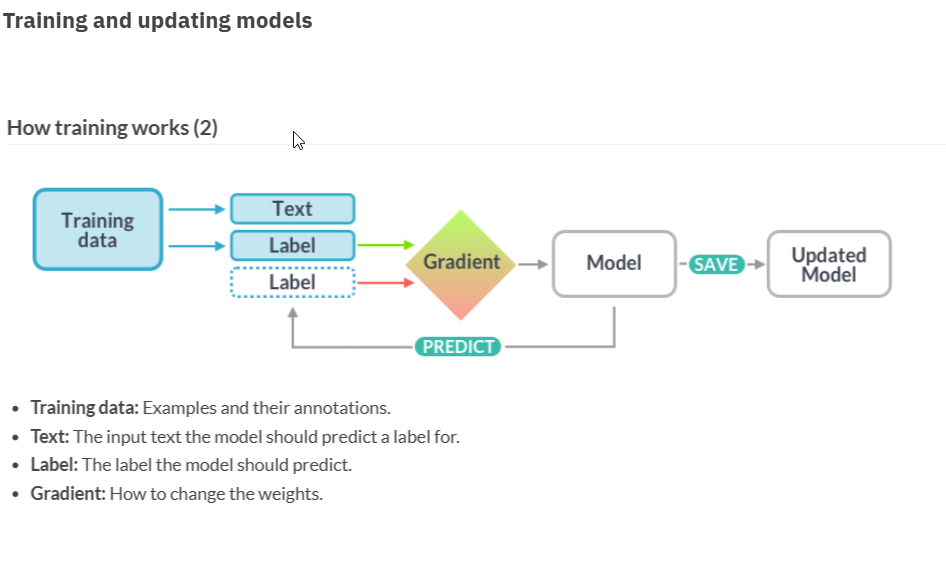

In [ ]:
import json
import spacy
from spacy.matcher import Matcher
from spacy.tokens import Span, DocBin

with open("exercises/en/iphone.json", encoding="utf8") as f:
    TEXTS = json.loads(f.read())

nlp = spacy.blank("en")
matcher = Matcher(nlp.vocab)
# Add patterns to the matcher
pattern1 = ([{"LOWER": "iphone"}, {"LOWER": "x"}])
pattern2 = [{"LOWER": "iphone"}, {"IS_DIGIT": True}]
matcher.add("GADGET", [pattern1, pattern2])
docs = []
for doc in nlp.pipe(TEXTS):
    matches = matcher(doc)
    spans = [Span(doc, start, end, label=match_id) for match_id, start, end in matches]
    doc.ents = spans
    docs.append(doc)

doc_bin = DocBin(docs=docs)
doc_bin.to_disk("./train.spacy")

In [4]:
#!pip install spacy-transformers
!python -m spacy init config config.cfg --lang en --pipeline textcat --optimize accuracy


✘ The provided output file already exists. To force overwriting the
config file, set the --force or -F flag.

